In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import csv 
from networkx.algorithms import approximation as ax
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating graphs and adding edges 

In [2]:
# Creating two graphs for the Power and Instrument cables seprately
G1 = nx.Graph()
G2 = nx.Graph()

# Reading entry nodes table
tbl1 = r"C:\Users\User\Documents\University of Alberta\Fall2020\603\603Project\tblNodes.xlsx"
df1 = pd.read_excel(tbl1, sheet_name = "tblNodes", skiprows = 0)

# Reading entry edges table
tbl2 = r"C:\Users\User\Documents\University of Alberta\Fall2020\603\603Project\EdgeWeights.xlsx"
df2 = pd.read_excel(tbl2, sheet_name = "EdgeWeights", skiprows = 0)

# Reading entry End Points table
tbl3 = r"C:\Users\User\Documents\University of Alberta\Fall2020\603\603Project\tblEndPoints.xlsx"
df3 = pd.read_excel(tbl3, sheet_name = "tblEndPoints", skiprows = 0)


# Creating separate lists for the power and instrument edges 
edges_CTP = []
edges_CTI = []

for index, row in df2.iterrows():
    if (row[5]=="CTP"):
        edges_CTP.append(1)
        edges_CTI.append(0)
    else:
        if (row[5]=="CTI"):
            edges_CTI.append(1)
            edges_CTP.append(0)
        else:
            edges_CTP.append(1)
            edges_CTI.append(1)
                    
# Adding edges to G1 and G2 graph
for index, row in df2.iterrows():
    if (edges_CTP[index]==1):
        G1.add_edge(row[1], row[2], weight=row[7], type=row[5])
    if (edges_CTI[index]==1):
        G2.add_edge(row[1], row[2], weight=row[7], type=row[5])

print("G1 has " + str(G1.number_of_nodes()) + " nodes and " + str(G1.number_of_edges()) + " edges")
print("G2 has " + str(G2.number_of_nodes()) + " nodes and " + str(G2.number_of_edges()) + " edges")

G1 has 6057 nodes and 8830 edges
G2 has 5654 nodes and 7851 edges


# Approach 1: Shortest-path-only solution

## Finding the shortest paths for all seven cables individually.

## Dijkstra's Algorithm

In [3]:
# Determining the shortest paths of the cables using Dijkstra's algorithm

shortest_paths_1 = [[] for i in range(7)]
dijkstra_path_length = []
dijkstra_start=datetime.now()

for index,row in df3.iterrows():
    # Finding the shortest paths and the path length for Power cables
    if (row[3]=="CTP"):
        shortest_paths_1[index] = nx.dijkstra_path(G1, row[1], row[2], weight='weight')
        path_length = nx.dijkstra_path_length(G1, row[1], row[2], weight='weight')
        dijkstra_path_length.append(path_length)
        
    # Finding the shortest paths and the path length for Instrument cables
    if (row[3]=="CTI"):
        shortest_paths_1[index] = nx.dijkstra_path(G2, row[1], row[2], weight='weight')
        path_length = nx.dijkstra_path_length(G2, row[1], row[2], weight='weight')
        dijkstra_path_length.append(path_length)
print(dijkstra_path_length) 
print(shortest_paths_1[4])

# print("The total weight of shortest paths is: ", W1.size(weight="weight"))
# print("The total network number of nodes is: ", len(list(W1.nodes)))
dijkstra_runtime = datetime.now()-dijkstra_start
print ("Dijkstra's runtime = ", dijkstra_runtime)

[611.9285, 467.6575000000001, 637.4989999999999, 317.6755, 539.2029999999999, 435.403, 502.48799999999994]
[88129, 54693, 88128, 54692, 54694, 54496, 71347, 71348, 87842, 54408, 71349, 87843, 54410, 71285, 71407, 71411, 87913, 54420, 54421, 54422, 54423, 54424, 54425, 54426, 54427, 54428, 54429, 54430, 54544, 54757, 54758, 54759, 54762, 54763, 71828, 72057, 72120, 55132, 72125, 72059, 71830, 71472, 71027, 70741, 69925, 69247, 68559, 51982, 51983, 69148, 69151, 85530, 69150, 69153, 69156]
Dijkstra's runtime =  0:00:00.200457


## Bellman Ford's Algorithm 

In [4]:
# Determining the shortest paths of the cables using Bellman Ford's algorithm
shortest_paths_2 = [[] for i in range(7)]
bellman_path_length = []
bellman_start = datetime.now()

for index,row in df3.iterrows():
    # Finding the shortest paths and the path length for Power cables
    if (row[3]=="CTP"):
        shortest_paths_2[index] = nx.bellman_ford_path(G1, row[1], row[2], weight='weight')
        path_length = nx.bellman_ford_path_length(G1, row[1], row[2], weight='weight')
        bellman_path_length.append(path_length)
        
    # Finding the shortest paths and the path length for Instrument cables
    if (row[3]=="CTI"):
        shortest_paths_2[index] = nx.bellman_ford_path(G2, row[1], row[2], weight='weight')
        path_length = nx.bellman_ford_path_length(G2, row[1], row[2], weight='weight')
        bellman_path_length.append(path_length)
print(bellman_path_length) 
        
    
# print("The total weight of shortest paths is: ", W1.size(weight="weight"))
# print("The total network number of nodes is: ", len(list(W1.nodes)))
bellman_runtime = datetime.now()-bellman_start
print ("Bellman Ford runtime = ", bellman_runtime)    

[611.9285, 467.6575000000001, 637.4989999999999, 317.6755, 539.2029999999999, 435.403, 502.48799999999994]
Bellman Ford runtime =  0:00:01.342459


## A* Algorithm

In [5]:
# Determining the shortest paths of the cables using A* algorithm
shortest_paths_3 = [[] for i in range(7)]
astar_path_length = []
astar_start = datetime.now()

for index,row in df3.iterrows():
    # Finding the shortest paths and the path length for Power cables
    if (row[3]=="CTP"):
        shortest_paths_3[index] = nx.astar_path(G1, row[1], row[2], heuristic=None, weight='weight')
        path_length = nx.astar_path_length(G1, row[1], row[2], weight='weight')
        astar_path_length.append(path_length)
        
    # Finding the shortest paths and the path length for Instrument cables
    if (row[3]=="CTI"):
        shortest_paths_3[index] = nx.astar_path(G2, row[1], row[2], heuristic=None, weight='weight')
        path_length = nx.astar_path_length(G2, row[1], row[2], weight='weight')
        astar_path_length.append(path_length)
print(astar_path_length) 
        
    
# print("The total weight of shortest paths is: ", W1.size(weight="weight"))
# print("The total network number of nodes is: ", len(list(W1.nodes)))
Astar_runtime = datetime.now()-astar_start
print ("A* runtime = ", Astar_runtime)  

[611.9285, 467.6575000000001, 637.4989999999999, 317.6755, 539.2029999999999, 435.403, 502.48799999999994]
A* runtime =  0:00:00.299850


## Export results

In [6]:
#Collating cable lengths
all_results = {'Cable': ['Test 1','Test 2','Test 3','Test 4','Test 5','Test 6', 'Test 7'],
        "Dijkstra's": dijkstra_path_length,
        'Bellman Ford': bellman_path_length, 
        'A*': astar_path_length}
shortest = pd.DataFrame(all_results)
shortest

#Collating run times
runtimes = {'': ['Runtime'], "Dijkstra's": dijkstra_runtime,
        'Bellman Ford': bellman_runtime, 
        'A*': Astar_runtime}
run_time = pd.DataFrame(runtimes)
run_time

#Write results into csv
shortest.to_csv(r"C:\Users\User\Documents\University of Alberta\CAPSTONE\Data\sp_cable_lengths.csv")
run_time.to_csv(r"C:\Users\User\Documents\University of Alberta\CAPSTONE\Data\sp_runtimes.csv")
print("The csv file was written successfully and generated")

The csv file was written successfully and generated


In [7]:
# Write shortest paths into a csv file
edges = [[] for i in range(5000)]
count = 0
for i in range(7):
    size = len(shortest_paths_1[i])
    for j in range(size-1):
        edges[count].append("test_point%d" %(i+1))
        edges[count].append(shortest_paths_1[i][j])
        edges[count].append(shortest_paths_1[i][j+1])
        count = count + 1

myfile = open('Dijkstra_shortest_paths.csv', 'w+', newline ='') 

with myfile:
    write = csv.writer(myfile) 
    write.writerows(edges) 

## Calculate the total weight of the network: Shortest-paths-only

In [8]:
# Reading shortest paths table
df4 = pd.read_csv(r"C:\Users\User\Documents\University of Alberta\CAPSTONE\Data\Dijkstra_shortest_paths.csv", skiprows = 0)

prev_shortest_paths = [[] for i in range(7)]
for index, row in df4.iterrows():
    if (row[0]=="test_point1"):
        prev_shortest_paths[0].append(row[1])
    if (row[0]=="test_point2"):
        prev_shortest_paths[1].append(row[1])
    if (row[0]=="test_point3"):
        prev_shortest_paths[2].append(row[1])
    if (row[0]=="test_point4"):
        prev_shortest_paths[3].append(row[1])
    if (row[0]=="test_point5"):
        prev_shortest_paths[4].append(row[1])
    if (row[0]=="test_point6"):
        prev_shortest_paths[5].append(row[1])
    if (row[0]=="test_point7"):
        prev_shortest_paths[6].append(row[1])

# Adding edges to K graph
K = nx.Graph()
for index, row in df2.iterrows():
    K.add_edge(row[1], row[2], weight=row[7], type=row[5])

# Creating a joined graph for the shortest paths and calculating total weight
L = nx.Graph()
for index,row in df3.iterrows():
    Nb = len(prev_shortest_paths[index])
    for j in range(Nb-1):
        L.add_edge(prev_shortest_paths[index][j],prev_shortest_paths[index][j+1], weight=K.edges[prev_shortest_paths[index][j],prev_shortest_paths[index][j+1]]["weight"])
            
print("Total Weight: ", L.size(weight="weight"))
print("Total number of nodes: ", len(list(L.nodes)))
print("Total number of edges: ", len(list(L.edges)))

Total Weight:  3128.592000000001
Total number of nodes:  414
Total number of edges:  413


## Visualize network graph: Shortest-path-only Solution

### 2D Visualization: Shortest-path-only solution

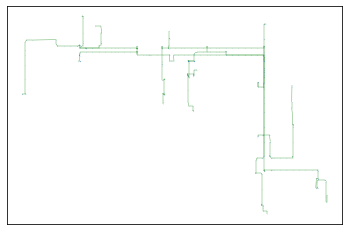

In [9]:
df4 = pd.DataFrame(list(L.nodes()), columns = ['Node'])

#Select the coordinates for the nodes in the shortest path network from the database
for i in df4.index:
    df4.loc[i, 'NodeX'] = df1.loc[(df1['Node'] == df4.loc[i, 'Node']), 
                                                       'NodeX'].iloc[0]
for i in df4.index:
    df4.loc[i, 'NodeY'] = df1.loc[(df1['Node'] == df4.loc[i, 'Node']), 
                                                       'NodeY'].iloc[0]
for i in df4.index:
    df4.loc[i, 'NodeZ'] = df1.loc[(df1['Node'] == df4.loc[i, 'Node']), 
                                                       'NodeZ'].iloc[0]

#Order all the nodes in the shortest paths network into a list
Keylist = df4['Node'].to_list()

#Order the coordinates into lists
Valuelist_1 = df4['NodeX'].to_list()
Valuelist_2  = df4['NodeY'].to_list()
Valuelist_3 = df4['NodeZ'].to_list()

#Visualize 2D network graph
Valuelists_2D_sp=list(zip(Valuelist_1, Valuelist_2))
pos1 = dict(zip(Keylist, Valuelists_2D_sp))

nx.draw_networkx_nodes(L, pos1, node_size=.001)
nx.draw_networkx_edges(L, pos1, edgelist = L.edges(), edge_color='g', width=.3)
plt.savefig("shortest-paths-only_2Dgraph.pdf")
    
plt.show()

### 3D Visualization: Shortest-path-only solution

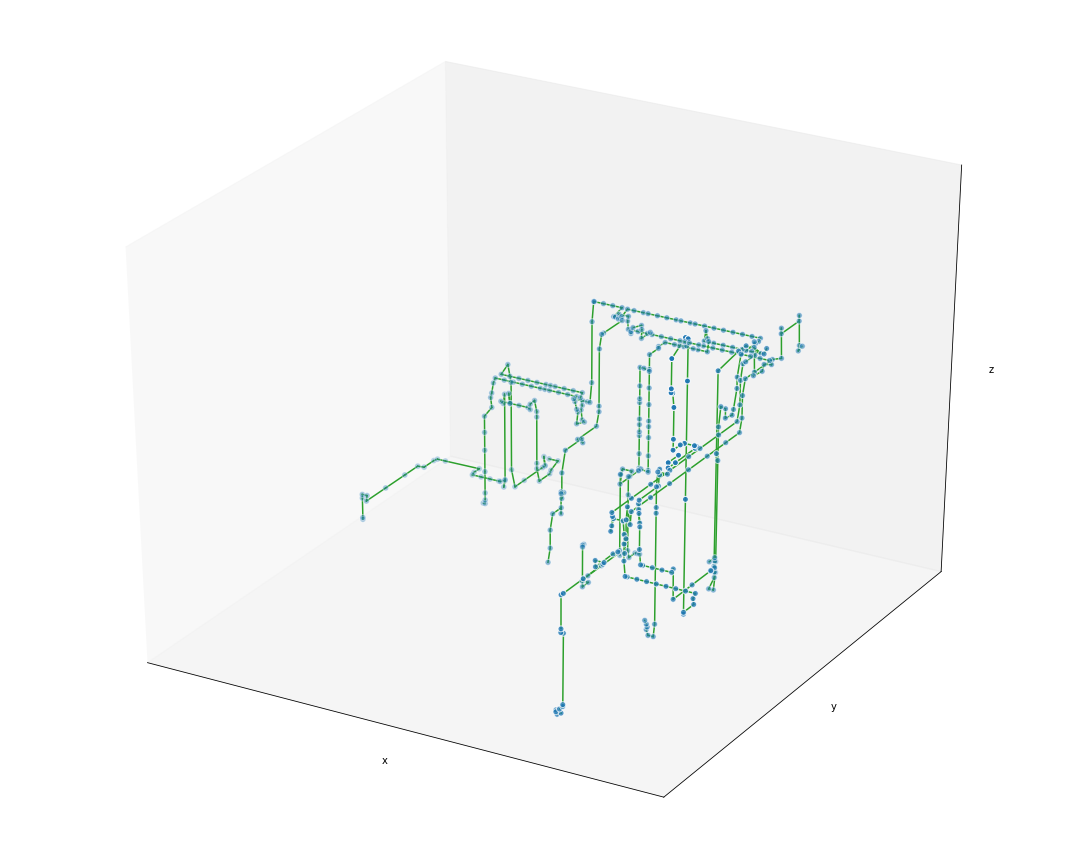

In [10]:
Valuelists_3D_sp=list(zip(Valuelist_1, Valuelist_2, Valuelist_3))
pos = dict(zip(Keylist, Valuelists_3D_sp))

# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in L])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in L.edges()])

# Create the 3D graph
fig = plt.figure(figsize=(15,12))
axes = fig.add_subplot(111, projection="3d")

# Plot the nodes
axes.scatter(*node_xyz.T, s=35, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    axes.plot(*vizedge.T, color="tab:green")

def _format_axes(axes):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    axes.grid(False)
    # Suppress tick labels
    for dim in (axes.xaxis, axes.yaxis, axes.zaxis):
        dim.set_ticks([])
    # Set axes labels
    axes.set_xlabel("x")
    axes.set_ylabel("y")
    axes.set_zlabel("z")

_format_axes(axes)
fig.tight_layout()
plt.savefig("shortest-paths-only_3Dgraph.pdf")
    
plt.show()

# Approach 2: Steiner-tree-solution

## Applying the Steiner tree function to connect the terminal nodes in the network.

In [11]:
# Adding source and destination nodes to the variable terminal_nodes
terminal_nodes1 = []
terminal_nodes2 = []
for index, row in df3.iterrows():
    if (row[3]=="CTP"):
        terminal_nodes1.append(row[1])
        terminal_nodes1.append(row[2])
    if (row[3]=="CTI"):
        terminal_nodes2.append(row[1])
        terminal_nodes2.append(row[2])
        
# Identifying isolated parts in the graphs
G1_parts = []
for c in nx.connected_components(G1):
    G1_parts.append(list(c))
G2_parts = []
for c in nx.connected_components(G2):
    G2_parts.append(list(c))

# Removing isolated parts from graphs
G11 = nx.Graph()
sizeG1 = len(G1_parts)
for i in range(sizeG1):
    size_aux = len(G1_parts[i])
    identifier = 0
    for j in range(size_aux):
        list_adj = list(G1.adj[G1_parts[i][j]])
        size_list = len(list_adj)
        for k in range(size_list):
            a = [G1_parts[i][j], list_adj[k]]
        if (G1.edges[a]["type"]=="CTP"):
            identifier = identifier + 1
    if (identifier!=0):
        for j in range(size_aux):
            list_adj = list(G1.adj[G1_parts[i][j]])
            size_list = len(list_adj)
            for k in range(size_list):
                a = [G1_parts[i][j], list_adj[k]]
                G11.add_edge(G1_parts[i][j], list_adj[k], weight=G1.edges[a]["weight"], type=G1.edges[a]["type"])
    
G22 = nx.Graph()    
sizeG2 = len(G2_parts)
for i in range(sizeG2):
    size_aux = len(G2_parts[i])
    identifier = 0
    for j in range(size_aux):
        list_adj = list(G2.adj[G2_parts[i][j]])
        size_list = len(list_adj)
        for k in range(size_list):
            a = [G2_parts[i][j], list_adj[k]]
        if (G2.edges[a]["type"]=="CTI"):
            identifier = identifier + 1
    if (identifier!=0):
        for j in range(size_aux):
            list_adj = list(G2.adj[G2_parts[i][j]])
            size_list = len(list_adj)
            for k in range(size_list):
                a = [G2_parts[i][j], list_adj[k]]
                G22.add_edge(G2_parts[i][j], list_adj[k], weight=G2.edges[a]["weight"], type=G2.edges[a]["type"])

In [12]:
print("Start of processing")
steiner_start = datetime.now()

# Steiner tree algorithm
H1 = ax.steinertree.steiner_tree(G11, terminal_nodes1, weight='weight')
H2 = ax.steinertree.steiner_tree(G22, terminal_nodes2, weight='weight')

print("H1 has " + str(H1.number_of_nodes()) + " nodes and " + str(H1.number_of_edges()) + " edges")
print("H2 has " + str(H2.number_of_nodes()) + " nodes and " + str(H2.number_of_edges()) + " edges")

print("End of processing")

Start of processing
H1 has 289 nodes and 288 edges
H2 has 115 nodes and 114 edges
End of processing


### Determining the shortest path for each cable from the Steiner tree solution and combining graphs to reflect shared edges.

In [13]:
# Determining the shortest paths and creating joined graph
steiner_shortest_paths = [[] for i in range(7)]
steiner_path_lengths = []
W = nx.Graph()
for index,row in df3.iterrows():
    if (row[3]=="CTP"):
        steiner_shortest_paths[index] = nx.dijkstra_path(H1, row[1], row[2], weight='weight')
        path_length = nx.dijkstra_path_length(H1, row[1], row[2], weight='weight')
        steiner_path_lengths.append(path_length)
        Nb = len(steiner_shortest_paths[index])
        for j in range(Nb-1):
            W.add_edge(steiner_shortest_paths[index][j],steiner_shortest_paths[index][j+1], color = 'r', weight=H1.edges[steiner_shortest_paths[index][j],steiner_shortest_paths[index][j+1]]["weight"])
    if (row[3]=="CTI"):
        steiner_shortest_paths[index] = nx.dijkstra_path(H2, row[1], row[2], weight='weight')
        path_length = nx.dijkstra_path_length(H2, row[1], row[2], weight='weight')
        steiner_path_lengths.append(path_length)
        Nb = len(steiner_shortest_paths[index])
        for j in range(Nb-1):
            W.add_edge(steiner_shortest_paths[index][j],steiner_shortest_paths[index][j+1], color = 'g', weight=H2.edges[steiner_shortest_paths[index][j],steiner_shortest_paths[index][j+1]]["weight"])
            
print(steiner_path_lengths)
steiner_results = {'Cable': ['Test 1','Test 2','Test 3','Test 4','Test 5','Test 6', 'Test 7'],
        "Path Length": steiner_path_lengths,}
steiner_shortest = pd.DataFrame(steiner_results)
steiner_shortest
#Write results into csv
steiner_shortest.to_csv(r"C:\Users\User\Documents\University of Alberta\CAPSTONE\Data\steiner_tree_cable_lengths.csv")
print("The csv file was written successfully and generated")

print("The total Steiner Tree weight is: ", W.size(weight="weight"))
print("The total network number of nodes is: ", len(list(W.nodes)))
print ("Total runtime = ", datetime.now()-steiner_start)

[611.9285, 484.88600000000014, 668.4345, 317.6755, 556.8644999999999, 445.872, 502.48799999999994]
The csv file was written successfully and generated
The total Steiner Tree weight is:  2852.255000000001
The total network number of nodes is:  374
Total runtime =  0:12:28.666917


In [14]:
# Write shortest paths into a csv file
edges = [[] for i in range(5000)]
count = 0
for i in range(7):
    size = len(steiner_shortest_paths[i])
    for j in range(size-1):
        edges[count].append("test_point%d" %(i+1))
        edges[count].append(steiner_shortest_paths[i][j])
        edges[count].append(steiner_shortest_paths[i][j+1])
        count = count + 1

myfile = open('steiner_shortest_paths.csv', 'w+', newline ='') 

with myfile:
    write = csv.writer(myfile) 
    write.writerows(edges) 

## Visualize network graph: Steiner-tree-solution

### 2D Visualization: Steiner-tree-solution

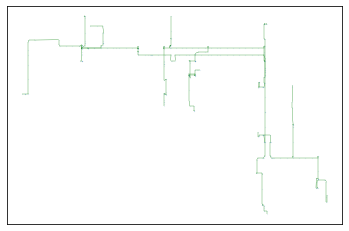

In [15]:
df5 = pd.DataFrame(list(W.nodes()), columns = ['Node'])

for i in df5.index:
    df5.loc[i, 'NodeX'] = df1.loc[(df1['Node'] == df5.loc[i, 'Node']), 
                                                       'NodeX'].iloc[0]
for i in df5.index:
    df5.loc[i, 'NodeY'] = df1.loc[(df1['Node'] == df5.loc[i, 'Node']), 
                                                       'NodeY'].iloc[0]
for i in df5.index:
    df5.loc[i, 'NodeZ'] = df1.loc[(df1['Node'] == df5.loc[i, 'Node']), 
                                                       'NodeZ'].iloc[0]

#All the nodes in all shortest paths
Keylist = df5['Node'].to_list()
# print(Keylist)
Valuelist_1 = df5['NodeX'].to_list()
Valuelist_2  = df5['NodeY'].to_list()
Valuelist_3 = df5['NodeZ'].to_list()
# print(Valuelist_2)
Valuelists_2D_st=list(zip(Valuelist_1, Valuelist_2))

pos1 = dict(zip(Keylist, Valuelists_2D_st))

nx.draw_networkx_nodes(W, pos1, node_size=.001)
nx.draw_networkx_edges(W, pos1, edgelist = W.edges(), edge_color='g', width=.3)
plt.savefig("steiner-tree-solution_2Dgraph.pdf")
    
plt.show()

### 3D Visualization: Steiner-tree-solution

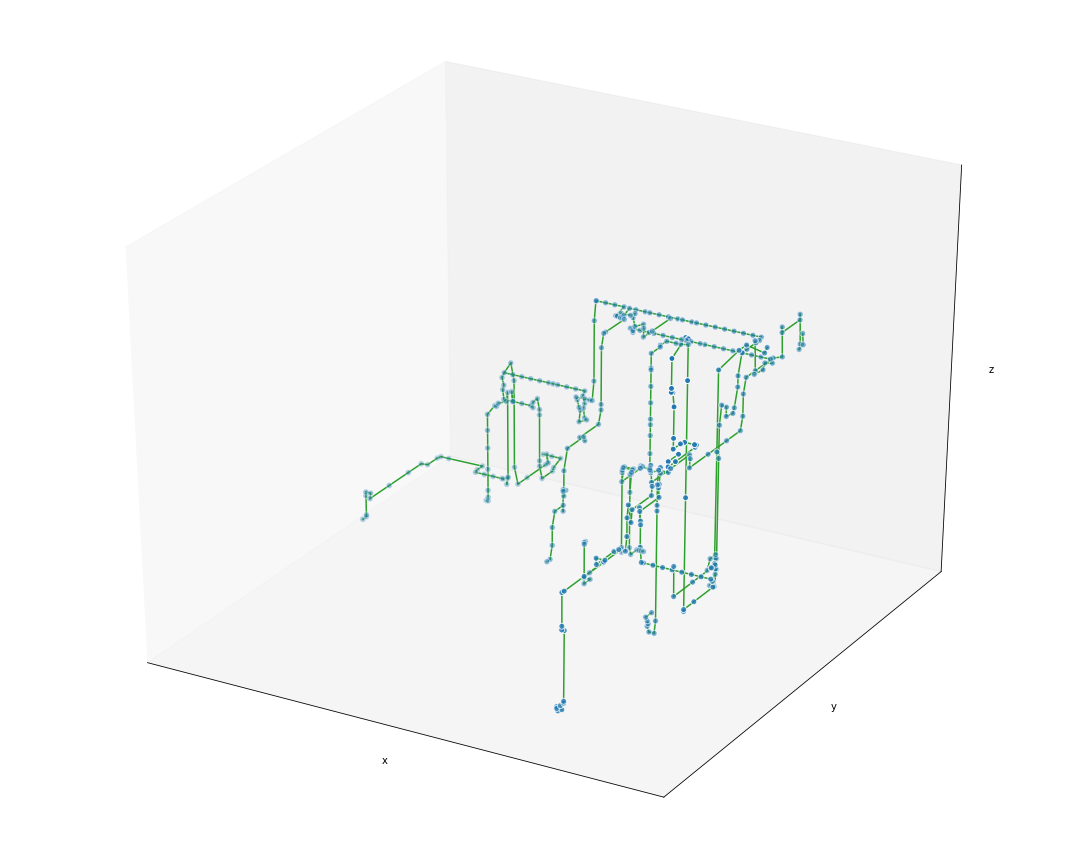

In [16]:
Valuelists_3D_st=list(zip(Valuelist_1, Valuelist_2, Valuelist_3))
pos = dict(zip(Keylist, Valuelists_3D_st))

# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in W])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in W.edges()])

# Create the 3D figure
fig = plt.figure(figsize=(15,12))
axes = fig.add_subplot(111, projection="3d")

# Plot the nodes
axes.scatter(*node_xyz.T, s=35, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    axes.plot(*vizedge.T, color="tab:green")

def _format_axes(axes):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    axes.grid(False)
    # Suppress tick labels
    for dim in (axes.xaxis, axes.yaxis, axes.zaxis):
        dim.set_ticks([])
    # Set axes labels
    axes.set_xlabel("x")
    axes.set_ylabel("y")
    axes.set_zlabel("z")

_format_axes(axes)
fig.tight_layout()
plt.savefig("steiner-tree-solution_3Dgraph.pdf")
    
plt.show()